### EBAY Data exploration

>What type of auctions are best for what products in terms of price ,time to sell ,bids

>Do lower opening bids give you more people bidding 

>Do lower opening bids give you better prices

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

CalledProcessError: Command '['ls', '../input']' returned non-zero exit status 1.

In [3]:
auction=pd.read_csv("auction.csv")
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [5]:

print("price item sold for",auction.groupby('item').price.mean())

price item sold for item
Cartier wristwatch     925.047906
Palm Pilot M515 PDA    231.130267
Xbox game console      143.857780
Name: price, dtype: float64


In [6]:
auction.isnull().sum()

auctionid        0
bid              0
bidtime          0
bidder          16
bidderrate      11
openbid          0
price            0
item             0
auction_type     0
dtype: int64

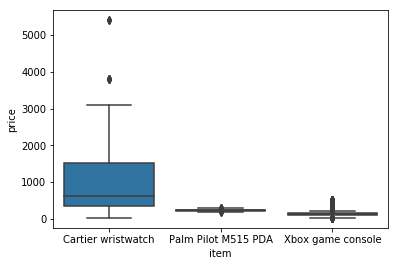

In [7]:
import seaborn as sns
sns.boxplot(x=auction.item,y=auction.price)

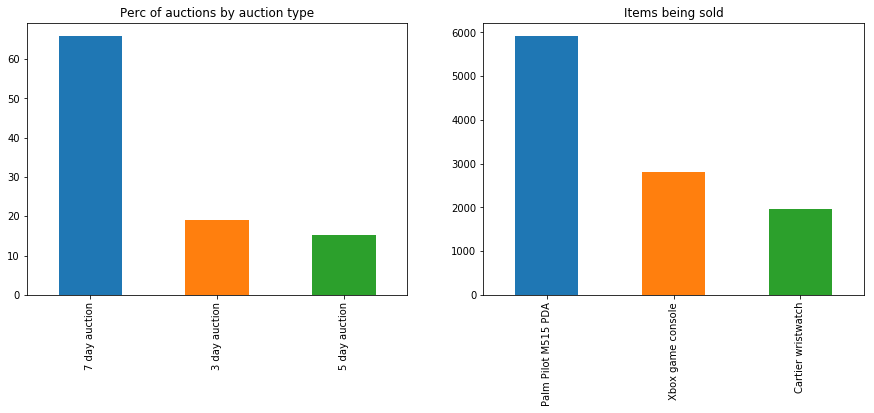

In [52]:
# Plot Images 

plt.figure(figsize=(15,5))

# 1
plt.subplot(1,2,1)
(auction.auction_type.value_counts()*100/auction.shape[0]).plot(kind='bar')
plt.title('Perc of auctions by auction type')

# 2
plt.subplot(1,2,2)
auction.item.value_counts().plot(kind='bar')
plt.title('Items being sold')


plt.show()

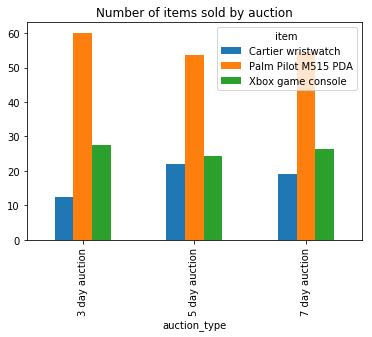

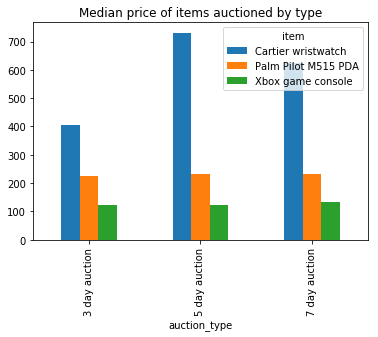

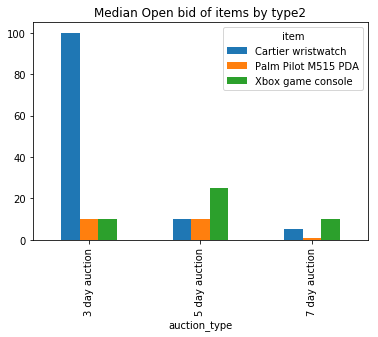

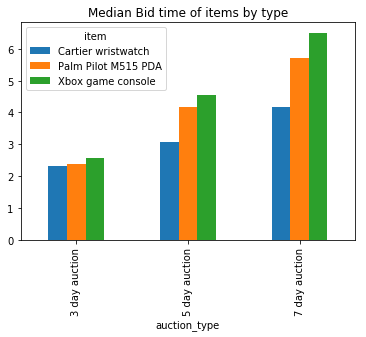

In [54]:
# Plot Images 


# 1
#plt.subplot(1,2,1)
pd.crosstab(auction.auction_type,auction.item).apply(lambda x:100*x/sum(x),axis=1).plot(kind='bar')
plt.title('Number of items sold by auction')

# 2
#plt.subplot(1,4,2)
auction.pivot_table(index='auction_type',columns='item',values='price',aggfunc=np.median ).plot(kind='bar')
plt.title('Median price of items auctioned by type')

# 3
#plt.subplot(1,4,3)
auction.pivot_table(index='auction_type',columns='item',values='openbid',aggfunc=np.median).plot(kind='bar')
plt.title('Median Open bid of items by type2')

# 4
#plt.subplot(1,4,4)
auction.pivot_table(index='auction_type',columns='item',values='bidtime',aggfunc=np.median).plot(kind='bar')
plt.title('Median Bid time of items by type')

plt.show()

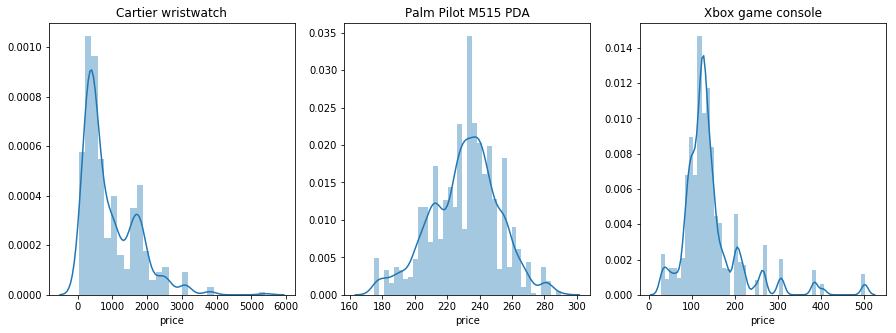

In [33]:
# Plot Images 

plt.figure(figsize=(15,5))

# 1
plt.subplot(1,3,1)
sns.distplot(auction.loc[auction.item=='Cartier wristwatch'].price)
plt.title('Cartier wristwatch')

# 2
plt.subplot(1,3,2)
sns.distplot(auction.loc[auction.item=='Palm Pilot M515 PDA'].price)
plt.title('Palm Pilot M515 PDA')

# 3
plt.subplot(1,3,3)
sns.distplot(auction.loc[auction.item=='Xbox game console'].price)
plt.title('Xbox game console')


plt.show()

In [19]:
print("Mean",auction.groupby('item').price.mean())
print("Median",auction.groupby('item').price.median())
#How long does it take to sell an item for each auction_type
print("Average time to sell",auction.bidtime.mean())
#ie close to 4th day bids start to come in

Mean item
Cartier wristwatch     925.047906
Palm Pilot M515 PDA    231.130267
Xbox game console      143.857780
Name: price, dtype: float64
Median item
Cartier wristwatch     620.0
Palm Pilot M515 PDA    232.5
Xbox game console      127.5
Name: price, dtype: float64
Average time to sell 3.9796281081704796


### What type of auctions are best for what products in terms of price ,time to sell ,bids

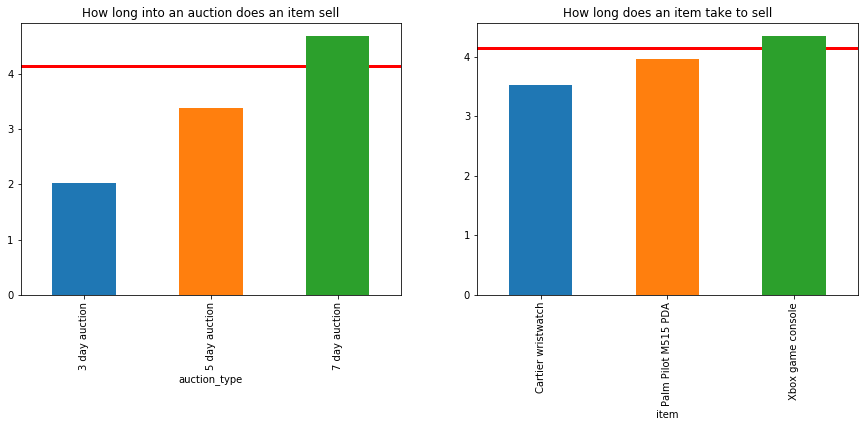

In [31]:
# Plot Images 

plt.figure(figsize=(15,5))

# 1
plt.subplot(1,2,1)
auction.groupby('auction_type').bidtime.mean().plot(kind='bar').axhline(y=auction.bidtime.median(),xmin=0,xmax=3,c="red",linewidth=3,zorder=0)
plt.title('How long into an auction does an item sell')

# 2
plt.subplot(1,2,2)
auction.groupby('item').bidtime.mean().plot(kind='bar').axhline(y=auction.bidtime.median(),xmin=0,xmax=3,c="red",linewidth=3,zorder=0)
plt.title('How long does an item take to sell')


plt.show()

In [22]:

one=auction.loc[auction.auctionid==1638893549]
#Thats odd the engine accepts lower bids???? after a higher bid has been put forth
one


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


### Do lower starting bids result in more people participating

Text(0.5,1,'Do lower bids result in more people participating')

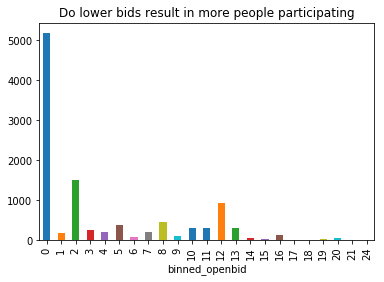

In [24]:

binned=[2,5,10,15,20,30,40,50,60,70,90,100,200,300,400,500,600,700,800,1000,2000,3000,4000,5000]
auction['binned_openbid']=np.digitize(auction.openbid,binned)
auction.groupby('binned_openbid').price.count().plot(kind='bar').set_title("Do lower bids result in more people participating")


### Do lower opening bids result in higher prices since competition increases

Text(0.5,1,'Do lower bids result in better prices')

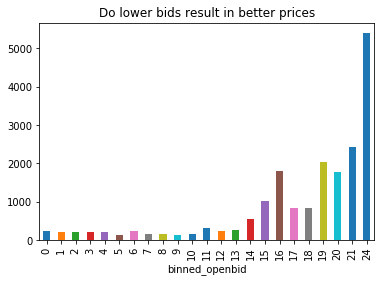

In [25]:

auction.groupby('binned_openbid').price.median().plot(kind='bar').set_title("Do lower bids result in better prices")
